<img src='harrypotter_image.png' width='200px' style="float:left;margin-right:10pt"></img>
## Illustration of NWHypergraph <-> HyperNetX exchange using PyBind and Kaggle's HarryPotter dataset.

In this tutorial we introduce `hypernetx.StaticEntity` and `hypernetx.StaticEntitySet` and the new `static=True` attribute in the `hypernetx.Hypergraph` class. We also use PyBind to communicate with a C++ function in PNNL's **NWHypergraph (NWHy)** library to illustrate our current work to optimize HyperNetX for large datasets.

Harry Potter Data is available here: https://www.kaggle.com/gulsahdemiryurek/harry-potter-dataset.

Python code for parsing the dataset is in `harrypotter.py` in this tutorial's directory.

In [4]:
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict, defaultdict
import scipy
from scipy.sparse import coo_matrix, csr_matrix, issparse
import pandas as pd
import numpy as np
import itertools as it
# import nwhy    ##### library loaded in this Docker container, not yet available for distribution
import sys
from harrypotter import HarryPotter

In [5]:
import importlib as imp

In [6]:
harryp = HarryPotter()
harryp.dataframe

,House,Blood status,Species,Hair colour,Eye colour
0,Gryffindor,Half-blood,Human,Black,Bright green
1,Gryffindor,Pure-blood,Human,Red,Blue
2,Gryffindor,Muggle-born,Human,Brown,Brown
3,Gryffindor,Half-blood,Human,Silver| formerly auburn,Blue
4,Gryffindor,Part-Human,Half-Human/Half-Giant,Black,Black
...,...,...,...,...,...
135,Unknown House,Unknown Blood status,Human,Grey,Unknown Eye colour
136,Unknown House,Unknown Blood status,Werewolf,Grey,Unknown Eye colour
137,Unknown House,Pure-blood or half-blood,Human,Blond,Blue
138,Unknown House,Unknown Blood status,Elf,Unknown Hair colour,Unknown Eye colour


In [7]:
E = hnx.StaticEntitySet(entity=harryp.dataframe,level1=0,level2=1)
H = hnx.Hypergraph(E)

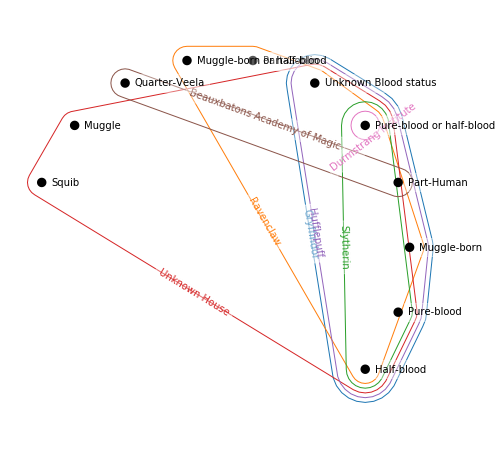

In [8]:
hnx.draw(H,layout=nx.shell_layout)

In [ ]:
## to compute distribution stats:
g = H.state_dict['g']
g.edge_size_dist(),g.node_size_dist()